In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Behaviors

In [ ]:
behaviors_path = "../raw/MINDsmall_train/raw_behaviour.tsv"
news_path = "../raw/MINDsmall_train/news.tsv"

raw_behavior = pd.read_csv(behaviors_path, sep="\t", names=["impressionId","userId","timestamp","click_history","impressions"])

raw_behavior.head()

,impressionId,userId,timestamp,click_history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


In [25]:
print(f"Số bài báo: {len(raw_behavior)}")

Số bài báo: 156965


In [26]:
print(f"Số người dùng {raw_behavior["userId"].nunique()}")

Số người dùng 50000


count    50000.000000
mean         3.139300
std          3.001026
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         62.000000
Name: count, dtype: float64


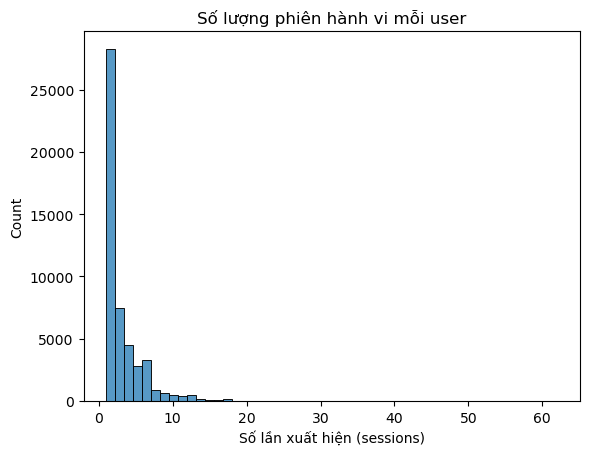

In [28]:
user_freq = raw_behavior['userId'].value_counts()
print(user_freq.describe())

sns.histplot(user_freq, bins=50)
plt.title("Số lượng phiên hành vi mỗi user")
plt.xlabel("Số lần xuất hiện (sessions)")
plt.show()


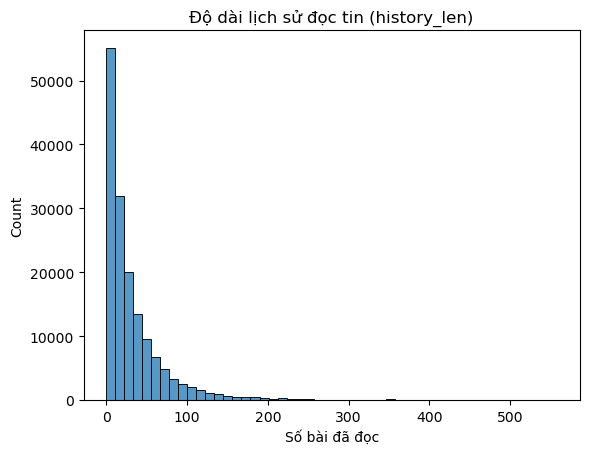

In [31]:
raw_behavior["history_len"] = raw_behavior["click_history"].fillna("").apply(lambda x: len(x.split()) if x != "" else 0)
sns.histplot(raw_behavior["history_len"], bins=50)
plt.title("Độ dài lịch sử đọc tin (history_len)")
plt.xlabel("Số bài đã đọc")
plt.show()


# News

In [ ]:
raw_news = pd.read_csv(news_path, sep="\t", names=["itemId", "category", "subcategory", "title", "abstract", "url","title_entities", "abstract_entities" ])

raw_news.head()

,itemId,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [12]:
print(f"Số lượng bài báo: {len(raw_news)}")

Số lượng bài báo: 51282


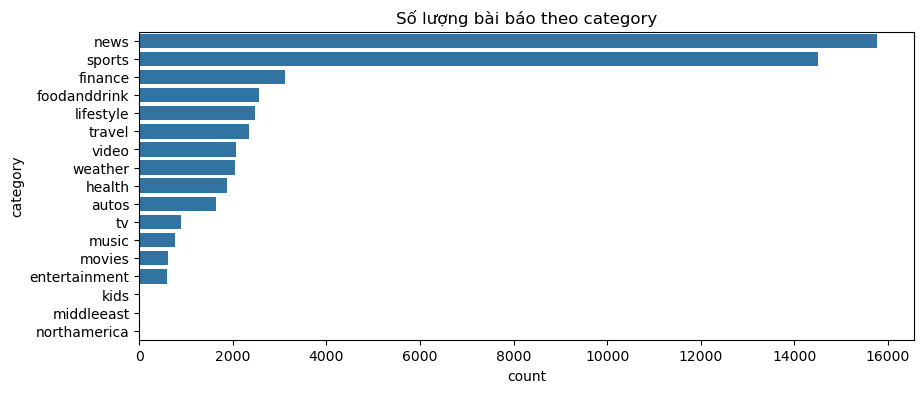

In [14]:
plt.figure(figsize=(10, 4))
sns.countplot(y='category', data=raw_news, order=raw_news['category'].value_counts().index)
plt.title("Số lượng bài báo theo category")
plt.show()

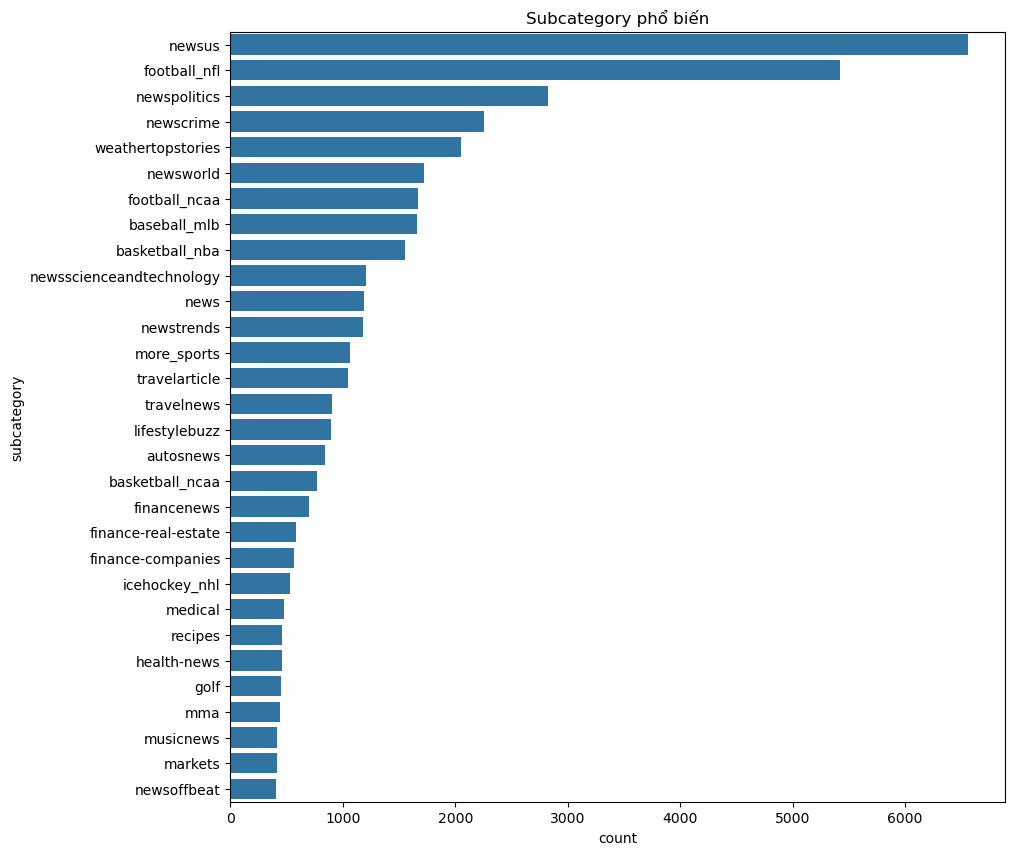

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(y='subcategory', data=raw_news, order=raw_news['subcategory'].value_counts().index[:30])
plt.title("Subcategory phổ biến")
plt.show()

          title_len  abstract_len
count  51282.000000  51282.000000
mean      66.247241    204.855817
std       19.216860    157.868432
min       11.000000      0.000000
25%       54.000000     90.000000
50%       64.000000    144.000000
75%       78.000000    390.000000
max      333.000000   2603.000000


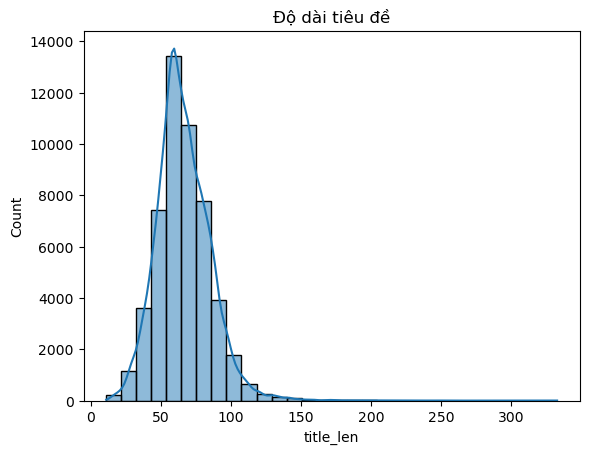

In [22]:
raw_news["title_len"] = raw_news["title"].fillna("").apply(len)
raw_news["abstract_len"] = raw_news["abstract"].fillna("").apply(len)

print(raw_news[["title_len", "abstract_len"]].describe())
sns.histplot(raw_news["title_len"], bins=30, kde=True)
plt.title("Độ dài tiêu đề")
plt.show()

CTR trung bình: 0.10854419797471164


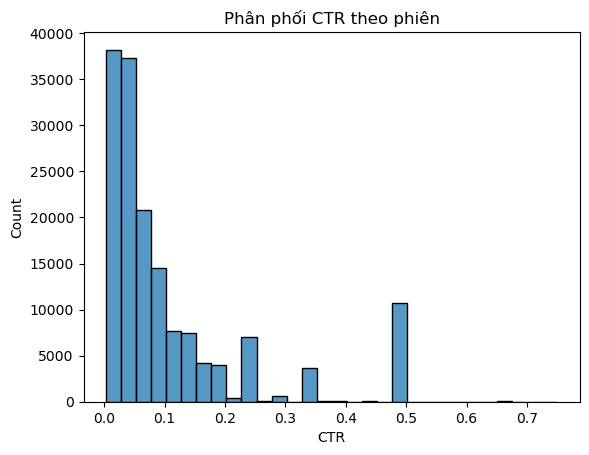

In [32]:
def calc_ctr(row):
    items = row.split()
    clicks = [x for x in items if x.endswith("-1")]
    return len(clicks) / len(items) if len(items) > 0 else 0

raw_behavior["ctr"] = raw_behavior["impressions"].apply(calc_ctr)
print("CTR trung bình:", raw_behavior["ctr"].mean())

sns.histplot(raw_behavior["ctr"], bins=30)
plt.title("Phân phối CTR theo phiên")
plt.xlabel("CTR")
plt.show()


In [ ]:
from itertools import chain

def extract_news_ids(row):
    items = row.split()
    return [x.split('-')[0] for x in items]

all_news_in_behavior = list(chain.from_iterable(raw_behavior["impressions"].apply(extract_news_ids)))
all_news_in_behavior = pd.Series(all_news_in_behavior)

missing_news = all_news_in_behavior[~all_news_in_behavior.isin(raw_news["itemId"])]

print("Số lượng bài báo trong raw_behavior không có trong news:", missing_news.nunique())


Số lượng bài báo trong raw_behavior không có trong news: 0


Số lượng entity trung bình trong tiêu đề: 1.168987168987169
Số lượng entity trung bình trong tóm tắt: 1.8585273585273585


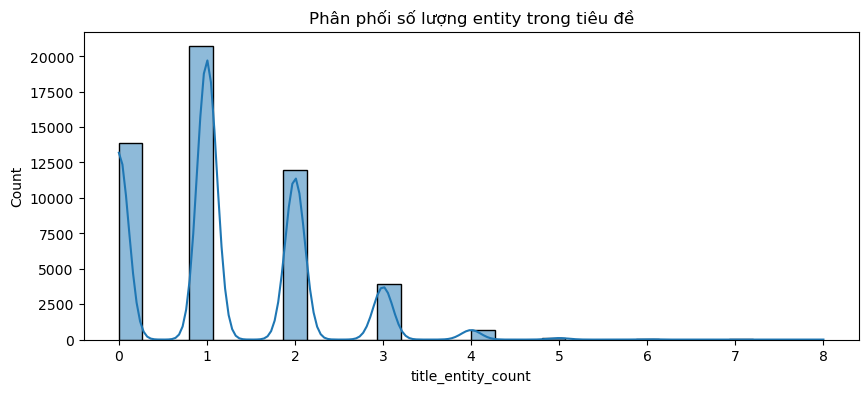

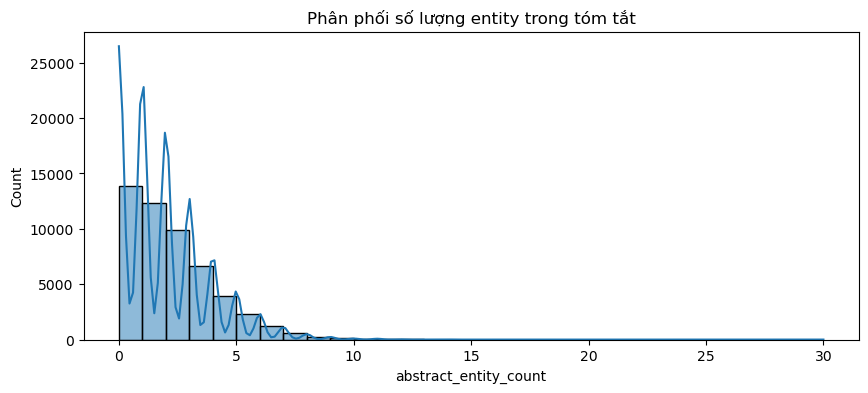

In [34]:
import json

def count_entities(text):
    if pd.isna(text) or text.strip() == "":
        return 0
    try:
        entities = json.loads(text)
        return len(entities)
    except:
        return 0

raw_news["title_entity_count"] = raw_news["title_entities"].apply(count_entities)
raw_news["abstract_entity_count"] = raw_news["abstract_entities"].apply(count_entities)

print("Số lượng entity trung bình trong tiêu đề:", raw_news["title_entity_count"].mean())
print("Số lượng entity trung bình trong tóm tắt:", raw_news["abstract_entity_count"].mean())

# Biểu đồ
plt.figure(figsize=(10,4))
sns.histplot(raw_news["title_entity_count"], bins=30, kde=True)
plt.title("Phân phối số lượng entity trong tiêu đề")
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(raw_news["abstract_entity_count"], bins=30, kde=True)
plt.title("Phân phối số lượng entity trong tóm tắt")
plt.show()


In [36]:
duplicate_titles = raw_news["title"].duplicated().sum()
print(f"Số lượng tiêu đề bị trùng lặp: {duplicate_titles}")

# Nếu bạn muốn xem một vài tiêu đề bị trùng
if duplicate_titles > 0:
    dup_df = raw_news[raw_news["title"].duplicated(keep=False)].sort_values("title")
    print("\nMột số tiêu đề trùng nhau:")
    print(dup_df[["itemId", "title"]].head(10))


Số lượng tiêu đề bị trùng lặp: 848

Một số tiêu đề trùng nhau:
       itemId                                              title
35832  N34049  'A game-changer': Titans' expansion project wi...
33999  N56680  'A game-changer': Titans' expansion project wi...
45242  N16531  'Baby Trump' balloon slashed at Alabama appear...
42376   N1034  'Baby Trump' balloon slashed at Alabama appear...
39222  N22807  'Beautiful day': Lots of sunshine, cooler temp...
48423  N14525  'Beautiful day': Lots of sunshine, cooler temp...
38964   N4863  'Go somewhere else and file': Judge tosses out...
47495  N41282  'Go somewhere else and file': Judge tosses out...
50781   N9523  'Hidden figures' to receive Congressional Gold...
48464   N9738  'Hidden figures' to receive Congressional Gold...


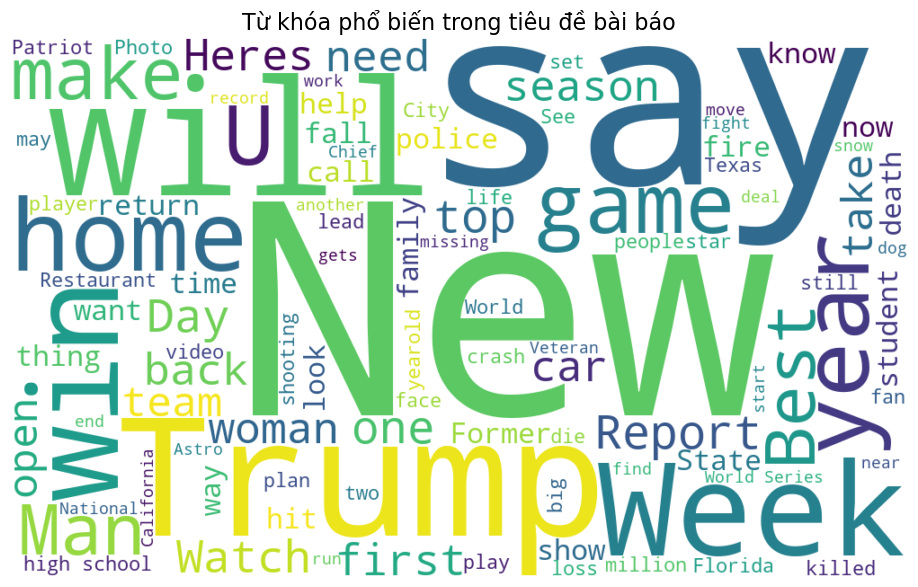

In [37]:
from wordcloud import WordCloud
import re

# Gộp toàn bộ tiêu đề thành một chuỗi lớn
all_titles = " ".join(raw_news["title"].dropna().tolist())

# Làm sạch sơ bộ: bỏ ký tự đặc biệt, giữ lại chữ cái
all_titles = re.sub(r"[^a-zA-Z\s]", "", all_titles)

# Tạo WordCloud
wordcloud = WordCloud(width=1000, height=600, background_color="white",
                      max_words=100, colormap="viridis").generate(all_titles)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Từ khóa phổ biến trong tiêu đề bài báo", fontsize=16)
plt.show()
